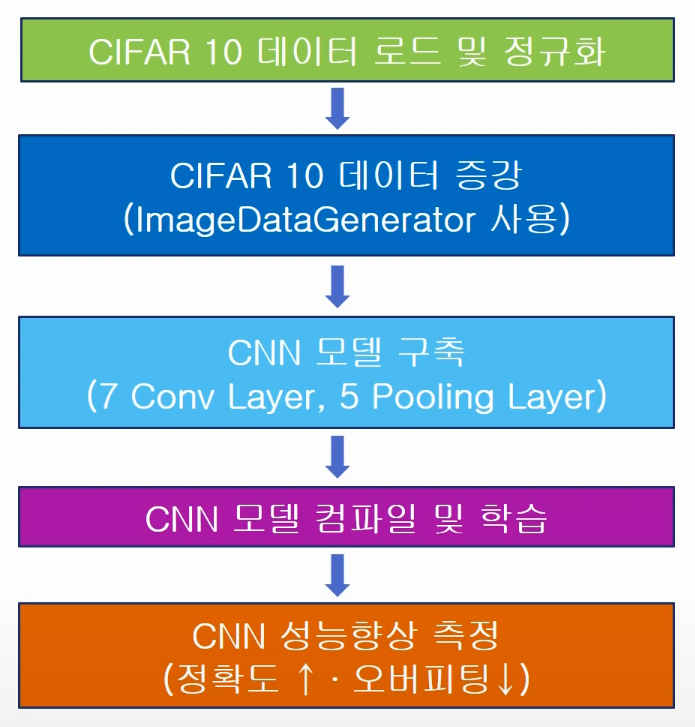

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
gen = ImageDataGenerator(rotation_range=20,
                         shear_range=0.2,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         horizontal_flip=True)

In [5]:
# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [6]:
# 데이터 보강 (150% 증대)
gen = ImageDataGenerator(rotation_range=20, shear_range=0.2, width_shift_range=0.2,
                        height_shift_range=0.2, horizontal_flip=True)

# 보강할 학습데이터 이미지 생성

augment_ratio = 1.5   # 전체 데이터의 150%
augment_size = int(augment_ratio * x_train.shape[0])

print(augment_size)

# 전체 x_train 개수의 150% 비율만큼
randidx = np.random.randint(x_train.shape[0], size=augment_size)

# 임의로 선택된 데이터는 원본데이터를 참조하기 때문에
# 원본데이터에 영향을 줄수 있음. 그래서 copy() 함수를 통해 안전하게 복사본 만듬
x_augmented = x_train[randidx].copy()  
y_augmented = y_train[randidx].copy()

print(x_augmented.shape, y_augmented.shape)

#  이미지 보강 실행
x_augmented, y_augmented = gen.flow(x_augmented, y_augmented, 
                                    batch_size=augment_size,
                                    shuffle=False).next()

print(x_augmented.shape, y_augmented.shape)

75000
(75000, 32, 32, 3) (75000, 1)
(75000, 32, 32, 3) (75000, 1)


In [7]:
# x_train, y_train 에 보강된 데이터 추가

x_train = np.concatenate( (x_train, x_augmented) )
y_train = np.concatenate( (y_train, y_augmented) )

print(x_train.shape, y_train.shape)

(125000, 32, 32, 3) (125000, 1)


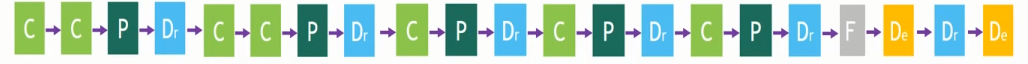

In [8]:
# CNN 모델 구축
cnn = Sequential()

cnn.add(Conv2D(32,(3,3),activation='relu', padding='same',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3),activation='relu', padding='same'))
cnn.add(Conv2D(64,(3,3),activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128,(3,3),activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(128,(3,3),activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(256,(3,3),activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [9]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

hist = cnn.fit(x_train,  y_train, batch_size=256, epochs=250, validation_data=(x_test, y_test))

Epoch 1/250
489/489 [==============================] - 19s 34ms/step - loss: 1.8018 - accuracy: 0.3245 - val_loss: 1.3770 - val_accuracy: 0.4932
Epoch 2/250
489/489 [==============================] - 16s 32ms/step - loss: 1.3690 - accuracy: 0.5083 - val_loss: 1.0857 - val_accuracy: 0.6051
Epoch 3/250
489/489 [==============================] - 16s 33ms/step - loss: 1.1832 - accuracy: 0.5820 - val_loss: 0.9671 - val_accuracy: 0.6453
Epoch 4/250
489/489 [==============================] - 16s 33ms/step - loss: 1.0725 - accuracy: 0.6254 - val_loss: 0.8590 - val_accuracy: 0.6956
Epoch 5/250
489/489 [==============================] - 16s 33ms/step - loss: 0.9976 - accuracy: 0.6543 - val_loss: 0.7950 - val_accuracy: 0.7197
Epoch 6/250
489/489 [==============================] - 16s 32ms/step - loss: 0.9348 - accuracy: 0.6765 - val_loss: 0.7425 - val_accuracy: 0.7360
Epoch 7/250
489/489 [==============================] - 16s 32ms/step - loss: 0.8868 - accuracy: 0.6947 - val_loss: 0.7027 - val_ac

489/489 [==============================] - 16s 33ms/step - loss: 0.5022 - accuracy: 0.8320 - val_loss: 0.4450 - val_accuracy: 0.8511
Epoch 58/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4921 - accuracy: 0.8340 - val_loss: 0.4780 - val_accuracy: 0.8440
Epoch 59/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4998 - accuracy: 0.8313 - val_loss: 0.4695 - val_accuracy: 0.8496
Epoch 60/250
489/489 [==============================] - 16s 32ms/step - loss: 0.4932 - accuracy: 0.8343 - val_loss: 0.4857 - val_accuracy: 0.8437
Epoch 61/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4858 - accuracy: 0.8354 - val_loss: 0.4657 - val_accuracy: 0.8499
Epoch 62/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4914 - accuracy: 0.8344 - val_loss: 0.4584 - val_accuracy: 0.8549
Epoch 63/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4899 - accuracy: 0.8347 - val_loss: 0.5036 - val_accuracy

489/489 [==============================] - 16s 32ms/step - loss: 0.4461 - accuracy: 0.8511 - val_loss: 0.4557 - val_accuracy: 0.8592
Epoch 114/250
489/489 [==============================] - 16s 32ms/step - loss: 0.4469 - accuracy: 0.8515 - val_loss: 0.4419 - val_accuracy: 0.8617
Epoch 115/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4355 - accuracy: 0.8542 - val_loss: 0.4425 - val_accuracy: 0.8613
Epoch 116/250
489/489 [==============================] - 16s 32ms/step - loss: 0.4423 - accuracy: 0.8520 - val_loss: 0.4316 - val_accuracy: 0.8679
Epoch 117/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4414 - accuracy: 0.8536 - val_loss: 0.4393 - val_accuracy: 0.8601
Epoch 118/250
489/489 [==============================] - 16s 34ms/step - loss: 0.4443 - accuracy: 0.8508 - val_loss: 0.4229 - val_accuracy: 0.8668
Epoch 119/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4416 - accuracy: 0.8528 - val_loss: 0.4577 - val_ac

489/489 [==============================] - 16s 32ms/step - loss: 0.4256 - accuracy: 0.8592 - val_loss: 0.4597 - val_accuracy: 0.8623
Epoch 169/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4240 - accuracy: 0.8600 - val_loss: 0.4488 - val_accuracy: 0.8655
Epoch 170/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4205 - accuracy: 0.8601 - val_loss: 0.4487 - val_accuracy: 0.8701
Epoch 171/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4209 - accuracy: 0.8618 - val_loss: 0.4460 - val_accuracy: 0.8678
Epoch 172/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4244 - accuracy: 0.8604 - val_loss: 0.5131 - val_accuracy: 0.8518
Epoch 173/250
489/489 [==============================] - 17s 34ms/step - loss: 0.4235 - accuracy: 0.8611 - val_loss: 0.4629 - val_accuracy: 0.8574
Epoch 174/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4213 - accuracy: 0.8617 - val_loss: 0.4470 - val_ac

Epoch 224/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4168 - accuracy: 0.8634 - val_loss: 0.4291 - val_accuracy: 0.8651
Epoch 225/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4193 - accuracy: 0.8634 - val_loss: 0.4372 - val_accuracy: 0.8657
Epoch 226/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4158 - accuracy: 0.8650 - val_loss: 0.4546 - val_accuracy: 0.8637
Epoch 227/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4134 - accuracy: 0.8651 - val_loss: 0.4755 - val_accuracy: 0.8595
Epoch 228/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4104 - accuracy: 0.8650 - val_loss: 0.4535 - val_accuracy: 0.8607
Epoch 229/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4160 - accuracy: 0.8643 - val_loss: 0.4646 - val_accuracy: 0.8624
Epoch 230/250
489/489 [==============================] - 16s 33ms/step - loss: 0.4210 - accuracy: 0.8630 - val_loss: 0

In [10]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4725 - accuracy: 0.8619


[0.4725046753883362, 0.8618999719619751]

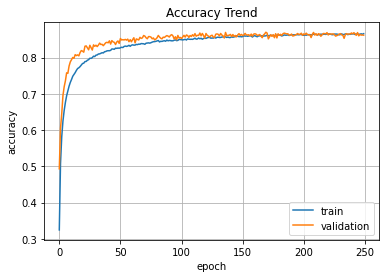

In [11]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

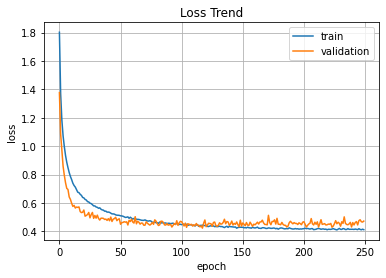

In [12]:

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()